In [ ]:
# 시각화 글씨 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# Table 불러오기
df_2022=pd.read_csv('간호기록2022.csv', encoding='cp949')

df_2023=pd.read_csv('간호기록2023.csv', encoding='cp949')

In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   순번         8559 non-null   int64 
 1   환자명        8559 non-null   object
 2   작성일시       8559 non-null   object
 3   간호진술문ID    8559 non-null   int64 
 4   진술문명       8559 non-null   object
 5   PRE-NOTE   153 non-null    object
 6   POST-NOTE  152 non-null    object
 7   간호용어       8389 non-null   object
 8   간호용어내용     8389 non-null   object
dtypes: int64(2), object(7)
memory usage: 601.9+ KB


In [ ]:
df_2022['진술문명'].value_counts()

의사에게 알림                 4213
prn order에 의해 투약함       2429
Dr.확인후 order에 의해 투약함     949
의사에게 확인함                 673
의사가 검진함                  159
해당 과에 알림                 121
담당 주치의에게 알림               15
Name: 진술문명, dtype: int64

In [ ]:
df_2022

# 1."의사에게 알림"과 "의사에게 확인함"을 하나의 카테고리로 합치기

In [ ]:
df_2022 = df_2022.replace({'진술문명':'의사에게 알림'},'의사에게 알림&확인')

In [ ]:
df_2022['진술문명'].value_counts()

의사에게 알림&확인              4213
prn order에 의해 투약함       2429
Dr.확인후 order에 의해 투약함     949
의사에게 확인함                 673
의사가 검진함                  159
해당 과에 알림                 121
담당 주치의에게 알림               15
Name: 진술문명, dtype: int64

In [ ]:
df_2022 = df_2022.replace({'진술문명':'의사에게 확인함'},'의사에게 알림&확인')

In [ ]:
df_2022['진술문명'].value_counts()

의사에게 알림&확인              4886
prn order에 의해 투약함       2429
Dr.확인후 order에 의해 투약함     949
의사가 검진함                  159
해당 과에 알림                 121
담당 주치의에게 알림               15
Name: 진술문명, dtype: int64

# 2. 중복된 값 제거

In [ ]:
df_2022=df_2022.iloc[:,0:5]
df_2022 = df_2022.drop_duplicates()

In [ ]:
df_2022['진술문명'].value_counts()

의사에게 알림&확인              2474
prn order에 의해 투약함       1124
Dr.확인후 order에 의해 투약함     331
의사가 검진함                  159
해당 과에 알림                 118
담당 주치의에게 알림                8
Name: 진술문명, dtype: int64

In [ ]:
df_2022

# 1. 2023데이터

In [ ]:
df_2023=pd.read_csv('간호기록2023.csv', encoding='cp949')

In [ ]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   순번         12017 non-null  int64 
 1   환자명        12017 non-null  object
 2   작성일시       12017 non-null  object
 3   간호진술문ID    12017 non-null  int64 
 4   진술문명       12017 non-null  object
 5   PRE-NOTE   190 non-null    object
 6   POST-NOTE  169 non-null    object
 7   간호용어       11809 non-null  object
 8   간호용어내용     11809 non-null  object
dtypes: int64(2), object(7)
memory usage: 845.1+ KB


In [ ]:
df_2023['작성일시']=pd.to_datetime(df_2023['작성일시'])
df_2023 = df_2023[df_2023['작성일시'].between('2023-01-16','2023-03-09')]

In [ ]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7367 entries, 0 to 12016
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   순번         7367 non-null   int64         
 1   환자명        7367 non-null   object        
 2   작성일시       7367 non-null   datetime64[ns]
 3   간호진술문ID    7367 non-null   int64         
 4   진술문명       7367 non-null   object        
 5   PRE-NOTE   123 non-null    object        
 6   POST-NOTE  99 non-null     object        
 7   간호용어       7241 non-null   object        
 8   간호용어내용     7241 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 575.5+ KB


In [ ]:
df = df_2023.drop_duplicates(subset=['순번','환자명','작성일시','간호진술문ID','진술문명'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 0 to 12015
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   순번         3640 non-null   int64         
 1   환자명        3640 non-null   object        
 2   작성일시       3640 non-null   datetime64[ns]
 3   간호진술문ID    3640 non-null   int64         
 4   진술문명       3640 non-null   object        
 5   PRE-NOTE   102 non-null    object        
 6   POST-NOTE  92 non-null     object        
 7   간호용어       3514 non-null   object        
 8   간호용어내용     3514 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 284.4+ KB


In [ ]:
df_2023 = df_2023.replace({'진술문명':'의사에게 알림'},'의사에게 알림&확인')
df_2023 = df_2023.replace({'진술문명':'의사에게 확인함'},'의사에게 알림&확인')

In [ ]:
df_2023['진술문명'].value_counts()

의사에게 알림&확인              3820
prn order에 의해 투약함       1719
Dr.확인후 order에 의해 투약함    1427
해당 과에 알림                 272
의사가 검진함                  121
담당 주치의에게 알림                8
Name: 진술문명, dtype: int64

In [ ]:
df_2023=df_2023.iloc[:,0:5]
df_2023 = df_2023.drop_duplicates()

In [ ]:
df_2023['진술문명'].value_counts()

의사에게 알림&확인              1926
prn order에 의해 투약함        809
Dr.확인후 order에 의해 투약함     512
해당 과에 알림                 268
의사가 검진함                  121
담당 주치의에게 알림                4
Name: 진술문명, dtype: int64

# 시각화_2022년

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_2022['진술문명'].value_counts()

의사에게 알림&확인              2474
prn order에 의해 투약함       1124
Dr.확인후 order에 의해 투약함     331
의사가 검진함                  159
해당 과에 알림                 118
담당 주치의에게 알림                8
Name: 진술문명, dtype: int64

In [ ]:
# 카테고리별 counts하여 dataframe으로 만들어주기
df_2022_cate = df_2022['진술문명'].value_counts().to_frame().reset_index()
df_2022_cate.index = range(1,7)
df_2022_cate.columns =['진술문명','개수']
df_2022_cate

,진술문명,개수
1,의사에게 알림&확인,2474
2,prn order에 의해 투약함,1124
3,Dr.확인후 order에 의해 투약함,331
4,의사가 검진함,159
5,해당 과에 알림,118
6,담당 주치의에게 알림,8


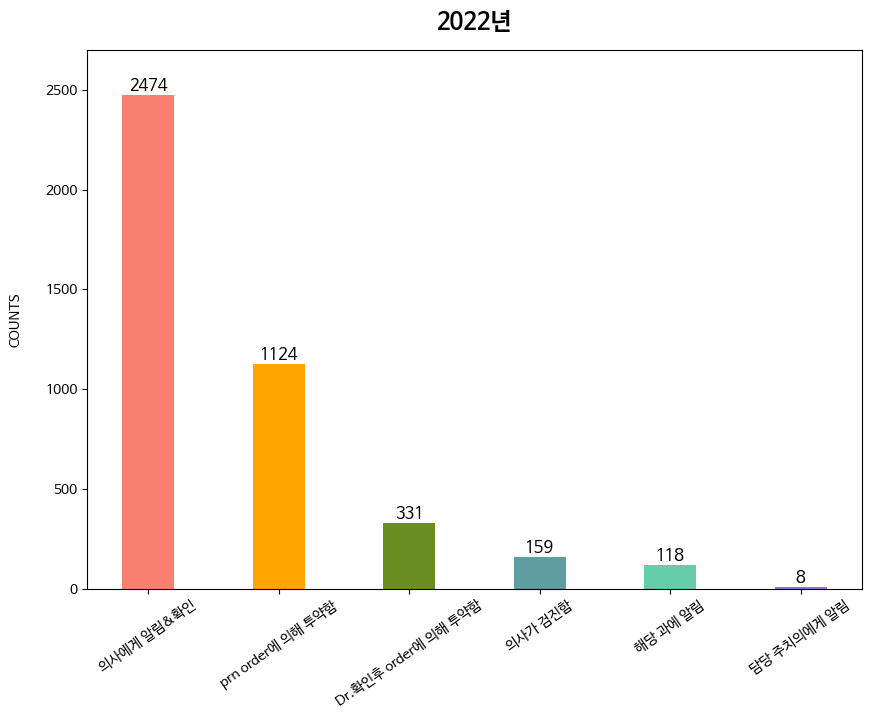

In [ ]:
# 전체 데이터 카테고리별 개수 시각화

plt.figure(figsize=(10,7))
bar = plt.bar(df_2022_cate.진술문명, df_2022_cate.개수, color=['salmon','orange','olivedrab','cadetblue','mediumaquamarine','mediumpurple','mediumvioletred'], width=0.4, label = df_2022_cate.진술문명)

# color > skyblue / violet / limegreen
plt.ylim(0,2700)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
# plt.xlabel('NURSING PROCESS', labelpad=13)
plt.xticks(rotation=35)
# 그리드 설정
plt.grid(False)

# plt.legend()
# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)

In [ ]:
# 카테고리별 counts하여 dataframe으로 만들어주기
df_2023_cate = df_2023['진술문명'].value_counts().to_frame().reset_index()
df_2023_cate.index = range(1,7)
df_2023_cate.columns =['진술문명','개수']
df_2023_cate = df_2023_cate.reindex([1,2,3,5,4,6])
df_2023_cate

,진술문명,개수
1,의사에게 알림&확인,1926
2,prn order에 의해 투약함,809
3,Dr.확인후 order에 의해 투약함,512
5,의사가 검진함,121
4,해당 과에 알림,268
6,담당 주치의에게 알림,4


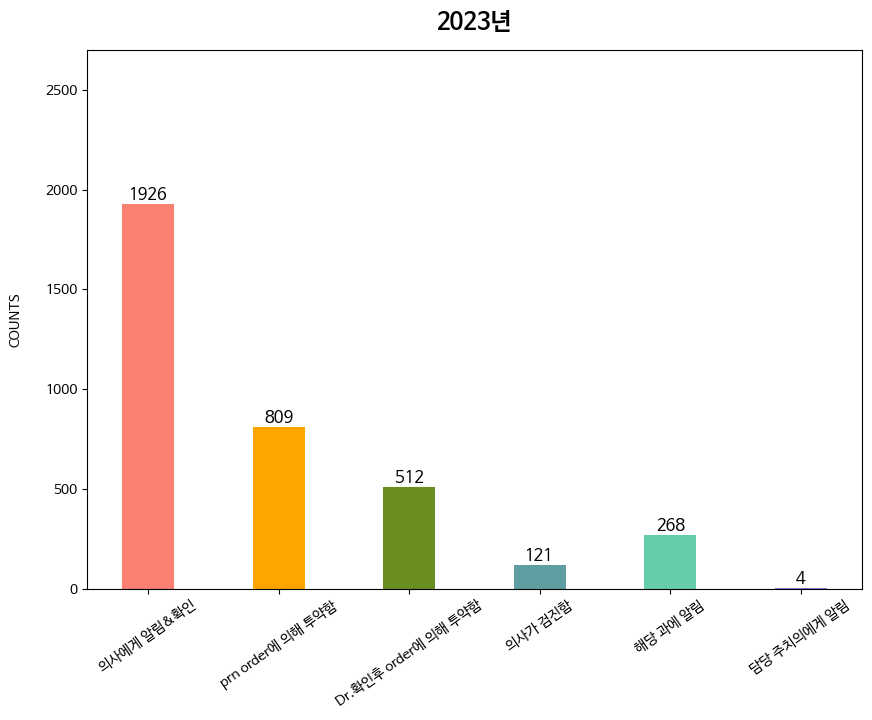

In [ ]:
# 전체 데이터 카테고리별 개수 시각화

plt.figure(figsize=(10,7))
bar = plt.bar(df_2023_cate.진술문명, df_2023_cate.개수, color=['salmon','orange','olivedrab','cadetblue','mediumaquamarine','mediumpurple','mediumvioletred'], width=0.4, label = df_2023_cate.진술문명)

# color > skyblue / violet / limegreen
plt.ylim(0,2700)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)

# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xticks(rotation=35)
# 그리드 설정
plt.grid(False)

# plt.legend()
# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)

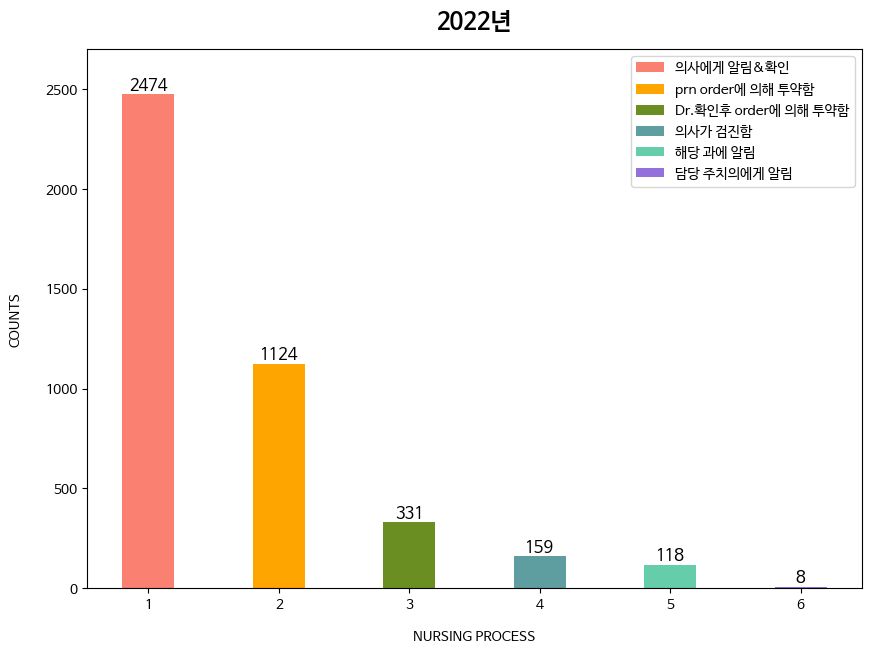

In [ ]:
# 전체 데이터 카테고리별 개수 시각화

plt.figure(figsize=(10,7))
bar = plt.bar(df_2022_cate.index, df_2022_cate.개수, color=['salmon','orange','olivedrab','cadetblue','mediumaquamarine','mediumpurple','mediumvioletred'], width=0.4, label = df_2022_cate.진술문명)

plt.ylim(0,2700)

title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)

# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('NURSING PROCESS', labelpad=13)
# plt.xticks(rotation=35)
# 그리드 설정
plt.grid(False)

plt.legend()
# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)

In [ ]:
df_2023_cate = df_2023_cate.reset_index()
df_2023_cate = df_2023_cate.iloc[:,1:3]
df_2023_cate.index = range(1,7)
df_2023_cate

,진술문명,개수
1,의사에게 알림&확인,1926
2,prn order에 의해 투약함,809
3,Dr.확인후 order에 의해 투약함,512
4,의사가 검진함,121
5,해당 과에 알림,268
6,담당 주치의에게 알림,4


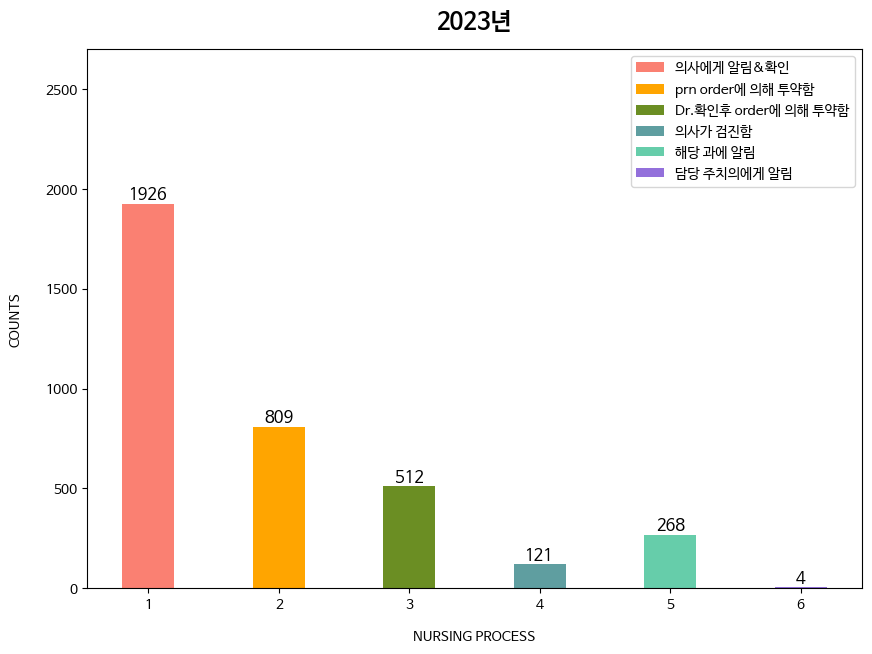

In [ ]:
# 전체 데이터 카테고리별 개수 시각화

plt.figure(figsize=(10,7))
bar = plt.bar(df_2023_cate.index, df_2023_cate.개수, color=['salmon','orange','olivedrab','cadetblue','mediumaquamarine','mediumpurple','mediumvioletred'], width=0.4, label = df_2023_cate.진술문명)

plt.ylim(0,2700)

title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)

# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('NURSING PROCESS', labelpad=13)
# plt.xticks(rotation=35)
# 그리드 설정
plt.grid(False)

plt.legend()
# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)

# 2022년 의사에게 알림&확인

In [ ]:
df_2022['작성일시']=pd.to_datetime(df_2022['작성일시'])
df_time = df_2022
df_time['hour'] = df_time['작성일시'].dt.hour

df_0=df_time[df_time['진술문명']=='의사에게 알림&확인']
df_0 = df_0['hour'].value_counts().to_frame().reset_index()
df_0.columns =['시간','진술문수']
df_0.sort_values('시간')

,시간,진술문수
16,0,62
18,1,23
20,2,11
22,3,4
23,4,2
21,5,5
17,6,33
19,7,19
15,8,79
6,9,150


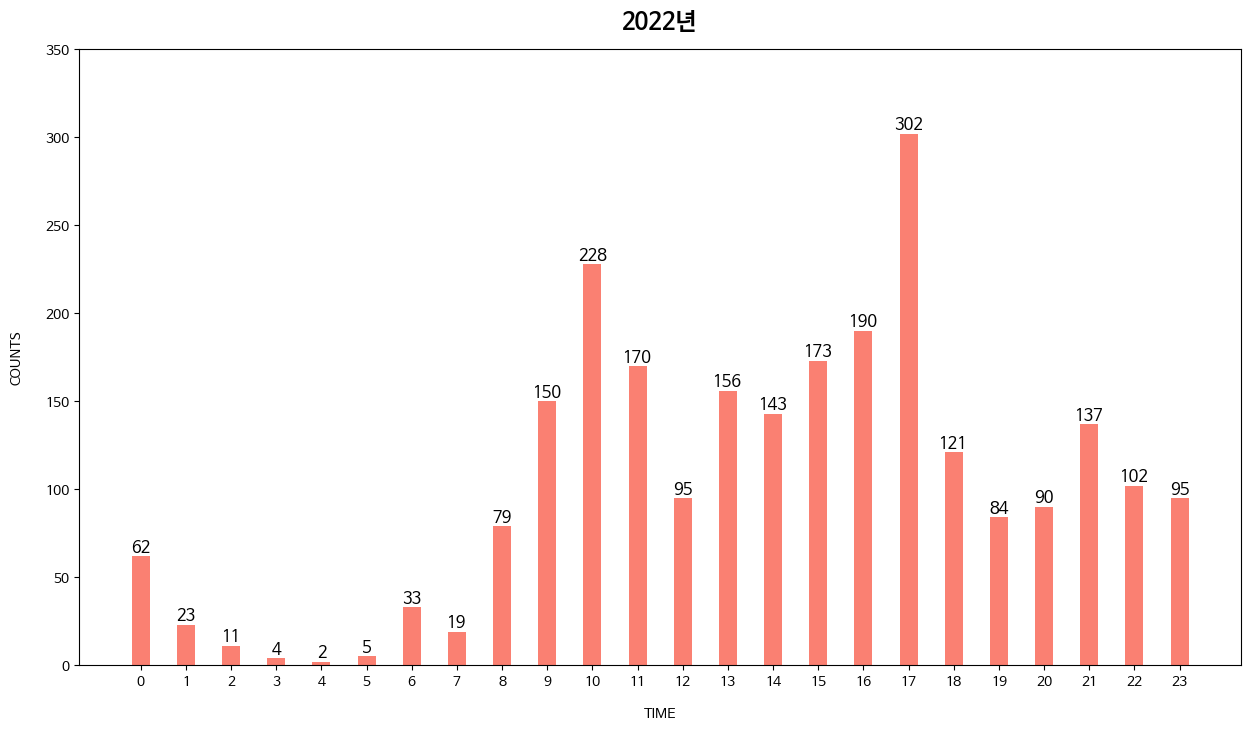

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_0.시간, df_0.진술문수, color='salmon', width=0.4)

# color > skyblue / violet / limegreen
plt.ylim(0,350)

title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)

# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_0.시간)
# 그리드 설정
plt.grid(False)

# plt.legend()
# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

# 2023년 의사에게 알림&확인

In [ ]:
df_2023['작성일시']=pd.to_datetime(df_2023['작성일시'])
df_time = df_2023
df_time['hour'] = df_time['작성일시'].dt.hour

df_0_2023=df_time[df_time['진술문명']=='의사에게 알림&확인']
df_0_2023 = df_0_2023['hour'].value_counts().to_frame().reset_index()
df_0_2023.columns =['시간','진술문수']
df_0_2023 = df_0_2023.sort_values('시간')

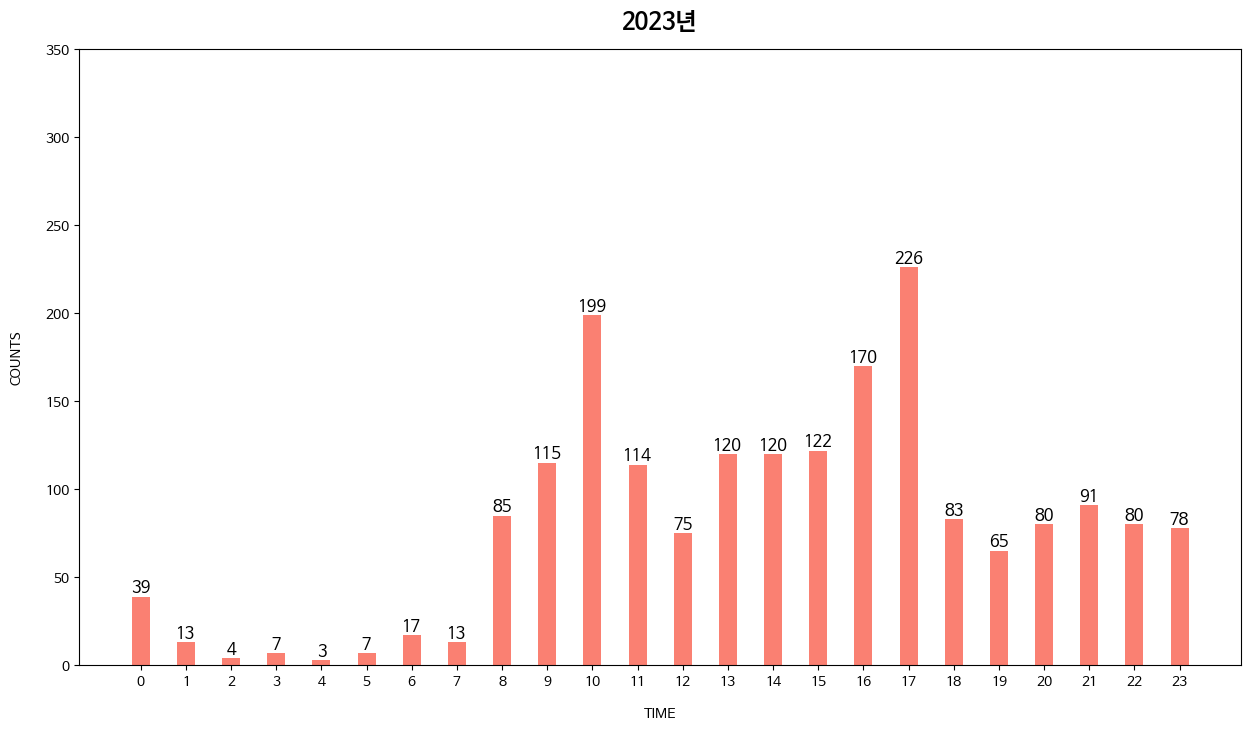

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_0_2023.시간, df_0_2023.진술문수, color='salmon', width=0.4)

# color > skyblue / violet / limegreen
plt.ylim(0,350)

title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)\

# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_0_2023.시간)
# 그리드 설정
plt.grid(False)

# plt.legend()
# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2023

,순번,환자명,작성일시,간호진술문ID,진술문명,hour
0,1,이**영,2023-02-10 15:46:00,321,의사에게 알림&확인,15
2,1,이**영,2023-02-11 12:26:00,321,의사에게 알림&확인,12
4,1,이**영,2023-02-11 12:37:00,317,의사가 검진함,12
5,1,이**영,2023-02-11 13:28:00,321,의사에게 알림&확인,13
6,1,이**영,2023-02-11 13:55:00,323,의사에게 알림&확인,13
...,...,...,...,...,...,...
12007,580,정**조,2023-03-07 17:47:00,323,의사에게 알림&확인,17
12009,580,정**조,2023-03-07 18:18:00,321,의사에게 알림&확인,18
12011,580,정**조,2023-03-08 09:29:00,323,의사에게 알림&확인,9
12013,581,윤**중,2023-03-08 15:43:00,321,의사에게 알림&확인,15


# prn order에 의해 투약함

In [ ]:
df_2022['작성일시']=pd.to_datetime(df_2022['작성일시'])
df_time = df_2022
df_time['hour'] = df_time['작성일시'].dt.hour

df_1=df_time[df_time['진술문명']=='prn order에 의해 투약함']
df_1 = df_1['hour'].value_counts().to_frame().reset_index()
df_1.columns =['시간','진술문수']
df_1 = df_1.sort_values('시간')

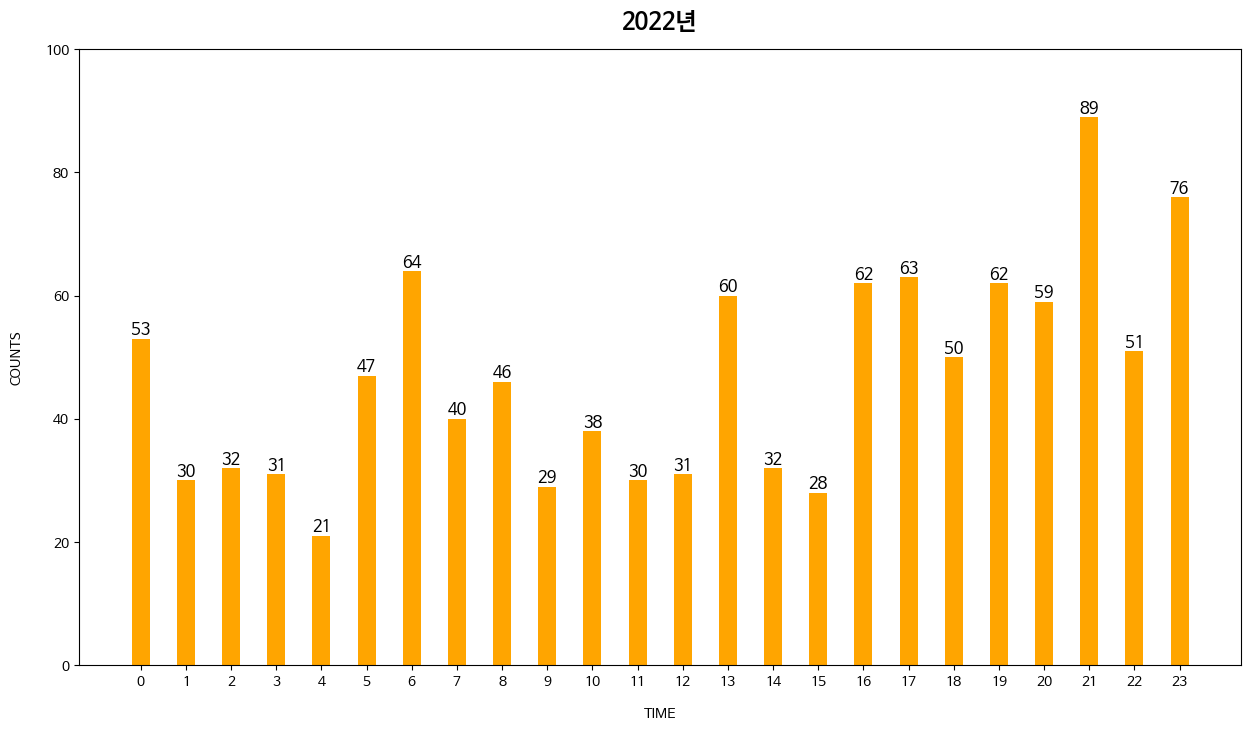

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_1.시간, df_1.진술문수, color='orange', width=0.4)

plt.ylim(0,100)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2023['작성일시']=pd.to_datetime(df_2023['작성일시'])
df_time = df_2023
df_time['hour'] = df_time['작성일시'].dt.hour

df_1_2023=df_time[df_time['진술문명']=='prn order에 의해 투약함']
df_1_2023 = df_1_2023['hour'].value_counts().to_frame().reset_index()
df_1_2023.columns =['시간','진술문수']
df_1_2023 = df_1_2023.sort_values('시간')

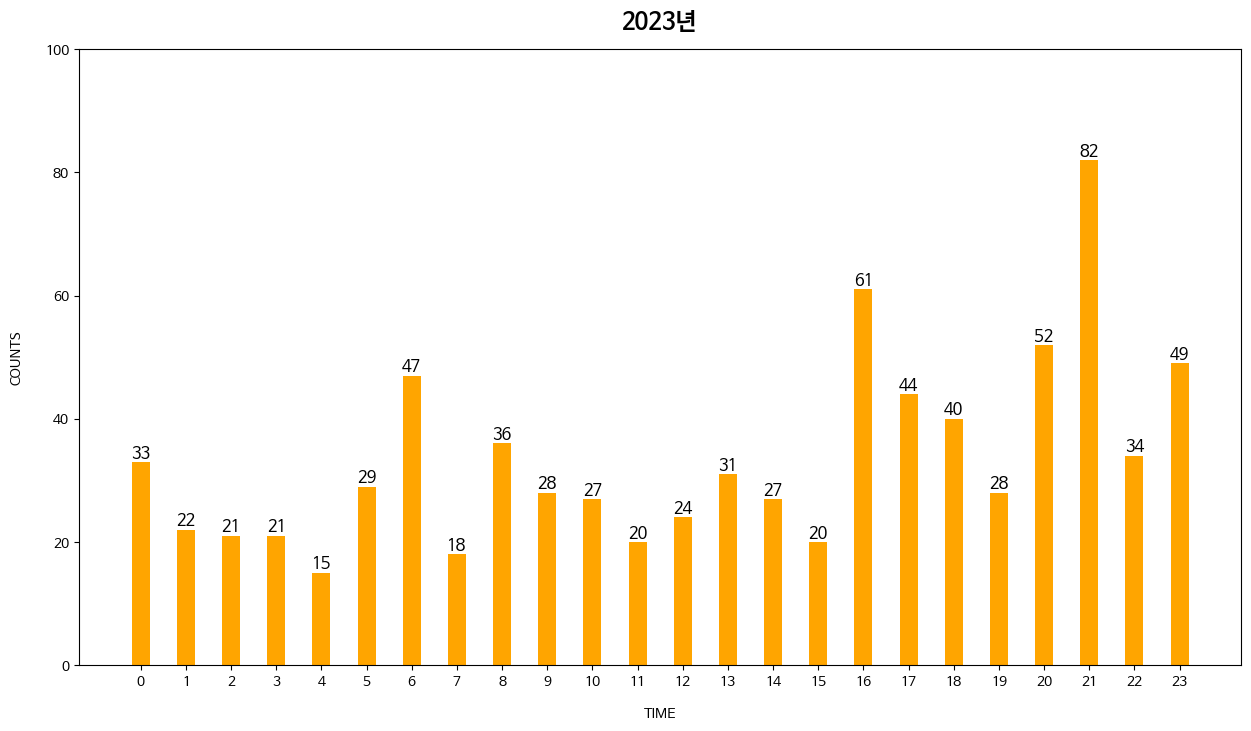

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_1_2023.시간, df_1_2023.진술문수, color='orange', width=0.4)

plt.ylim(0,100)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

# Dr.확인 후 order에 의해 투약함

In [ ]:
df_2022['작성일시']=pd.to_datetime(df_2022['작성일시'])
df_time = df_2022
df_time['hour'] = df_time['작성일시'].dt.hour

df_2=df_time[df_time['진술문명']=='Dr.확인후 order에 의해 투약함']
df_2 = df_2['hour'].value_counts().to_frame().reset_index()
df_2.columns =['시간','진술문수']
df_2 = df_2.sort_values('시간')

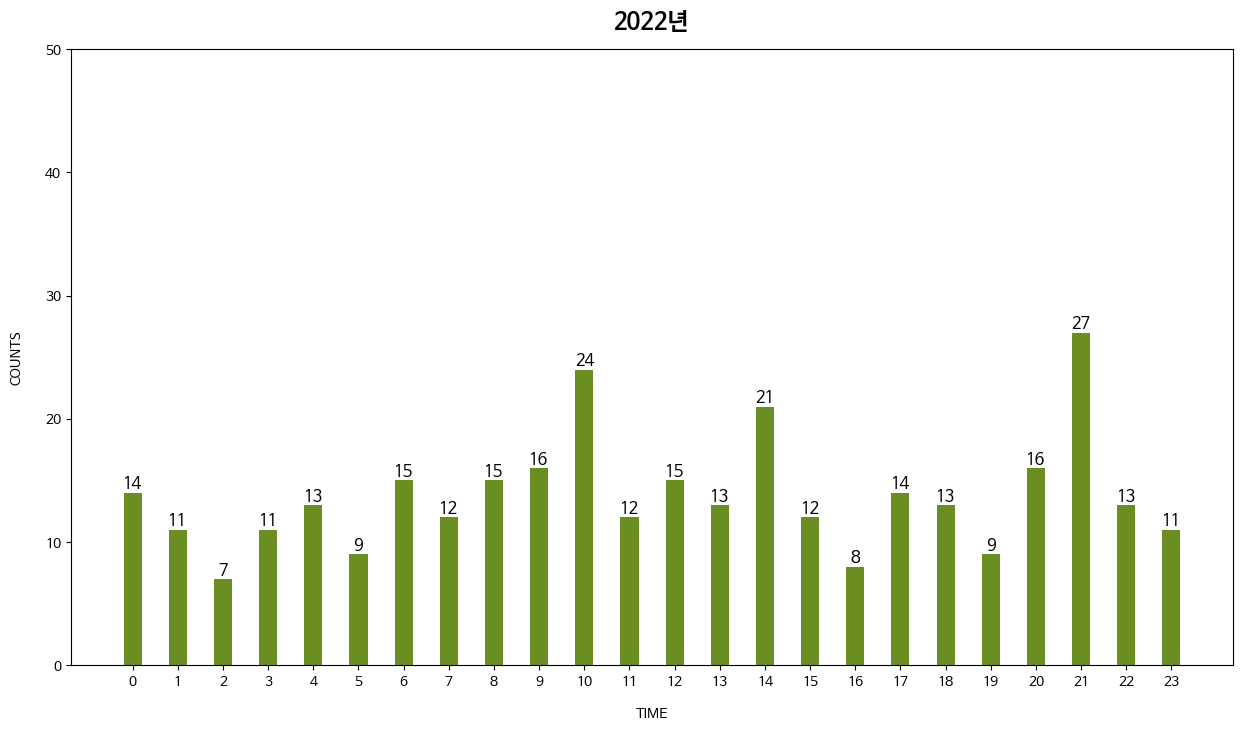

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_2.시간, df_2.진술문수, color='olivedrab', width=0.4)

plt.ylim(0,50)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2023['작성일시']=pd.to_datetime(df_2023['작성일시'])
df_time = df_2023
df_time['hour'] = df_time['작성일시'].dt.hour

df_2_2023=df_time[df_time['진술문명']=='Dr.확인후 order에 의해 투약함']
df_2_2023 = df_2_2023['hour'].value_counts().to_frame().reset_index()
df_2_2023.columns =['시간','진술문수']
df_2_2023 = df_2_2023.sort_values('시간')

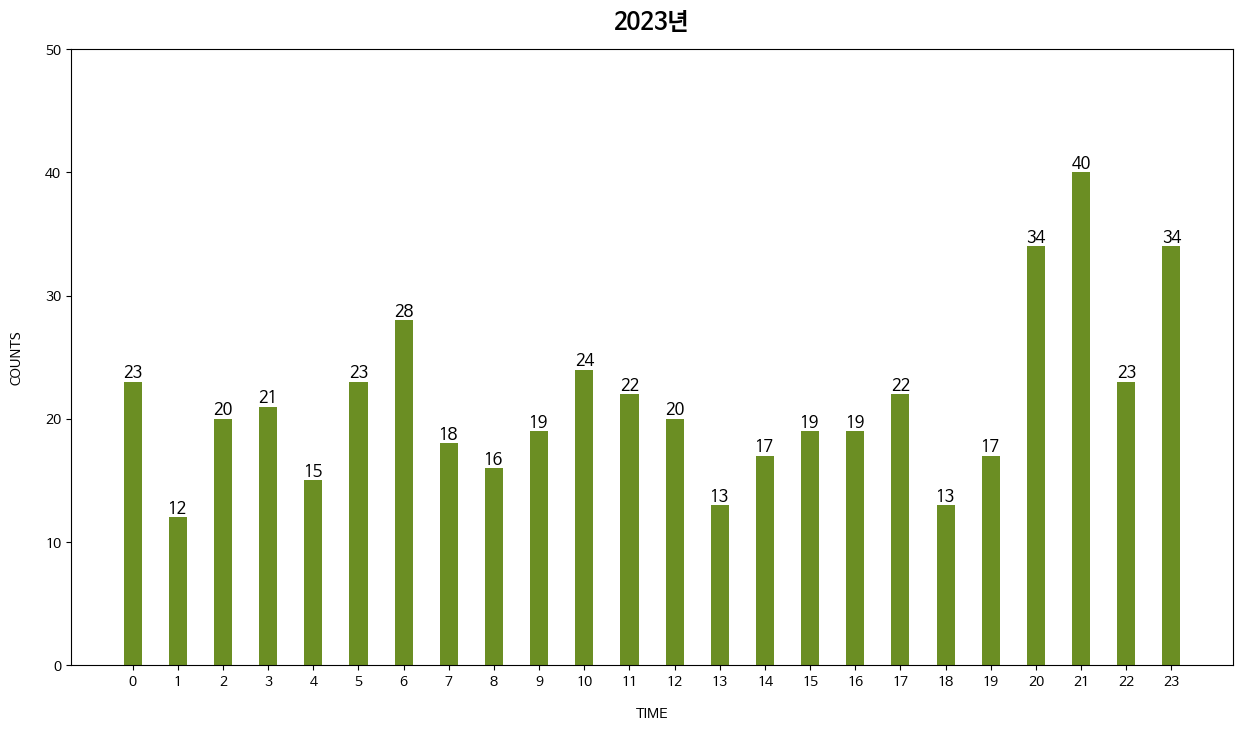

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_2_2023.시간, df_2_2023.진술문수, color='olivedrab', width=0.4)

plt.ylim(0,50)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

# 의사가 검진함

In [ ]:
df_2022['작성일시']=pd.to_datetime(df_2022['작성일시'])
df_time = df_2022
df_time['hour'] = df_time['작성일시'].dt.hour

df_3=df_time[df_time['진술문명']=='의사가 검진함']
df_3 = df_3['hour'].value_counts().to_frame().reset_index()
df_3.columns =['시간','진술문수']
df_3 = df_3.sort_values('시간')

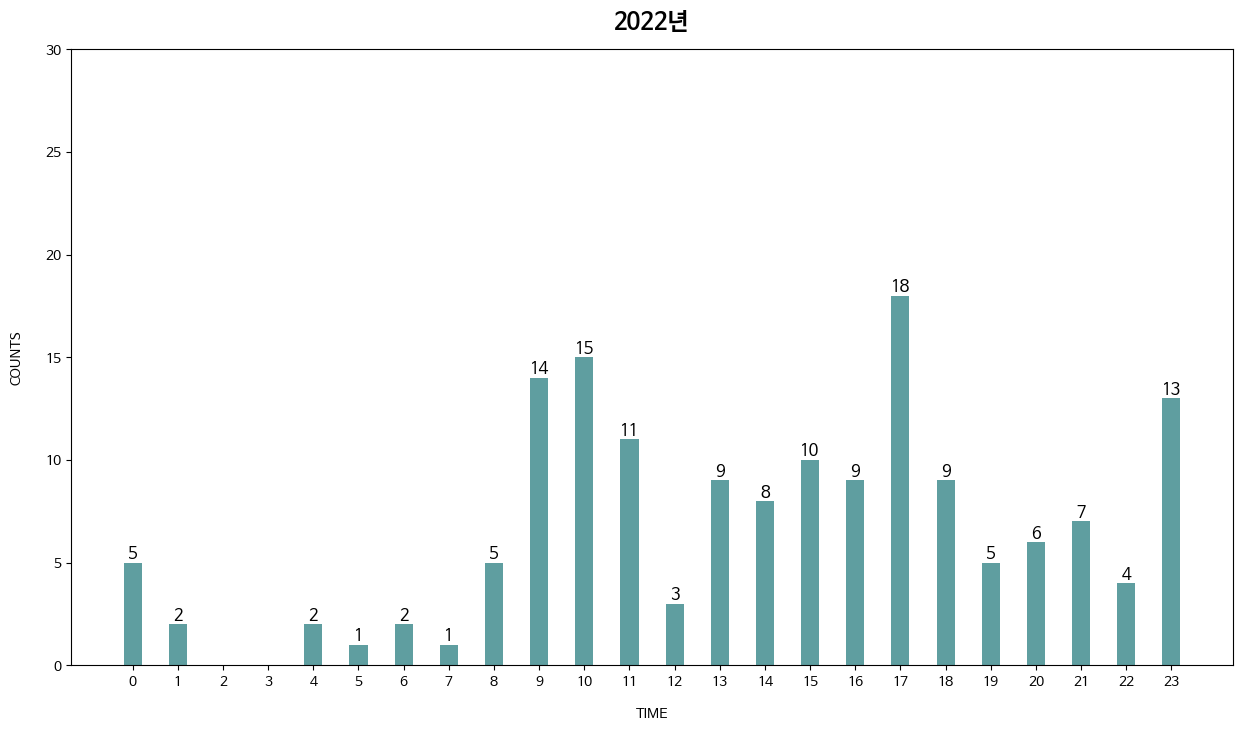

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_3.시간, df_3.진술문수, color='cadetblue', width=0.4)

plt.ylim(0,30)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2023['작성일시']=pd.to_datetime(df_2023['작성일시'])
df_time = df_2023
df_time['hour'] = df_time['작성일시'].dt.hour

df_3_2023=df_time[df_time['진술문명']=='의사가 검진함']
df_3_2023 = df_3_2023['hour'].value_counts().to_frame().reset_index()
df_3_2023.columns =['시간','진술문수']
df_3_2023 = df_3_2023.sort_values('시간')

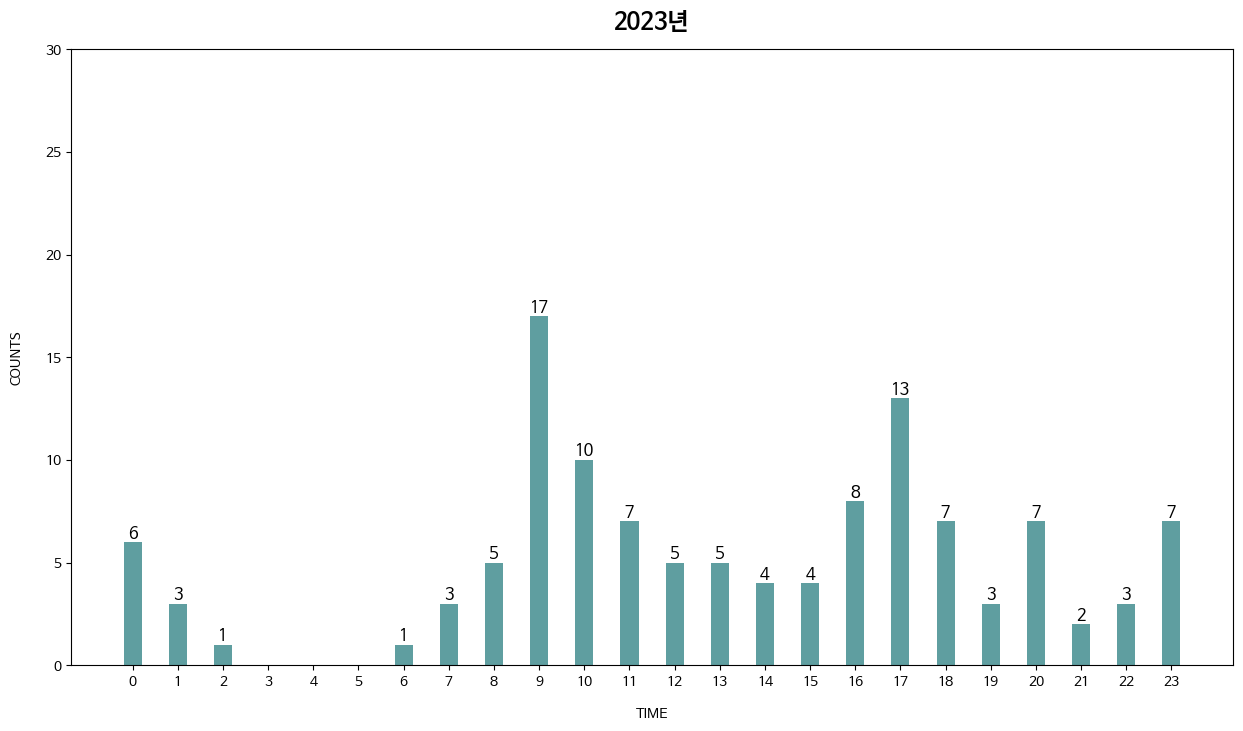

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_3_2023.시간, df_3_2023.진술문수, color='cadetblue', width=0.4)

plt.ylim(0,30)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2022['작성일시']=pd.to_datetime(df_2022['작성일시'])
df_time = df_2022
df_time['hour'] = df_time['작성일시'].dt.hour

df_4=df_time[df_time['진술문명']=='해당 과에 알림']
df_4 = df_4['hour'].value_counts().to_frame().reset_index()
df_4.columns =['시간','진술문수']
df_4 = df_4.sort_values('시간')

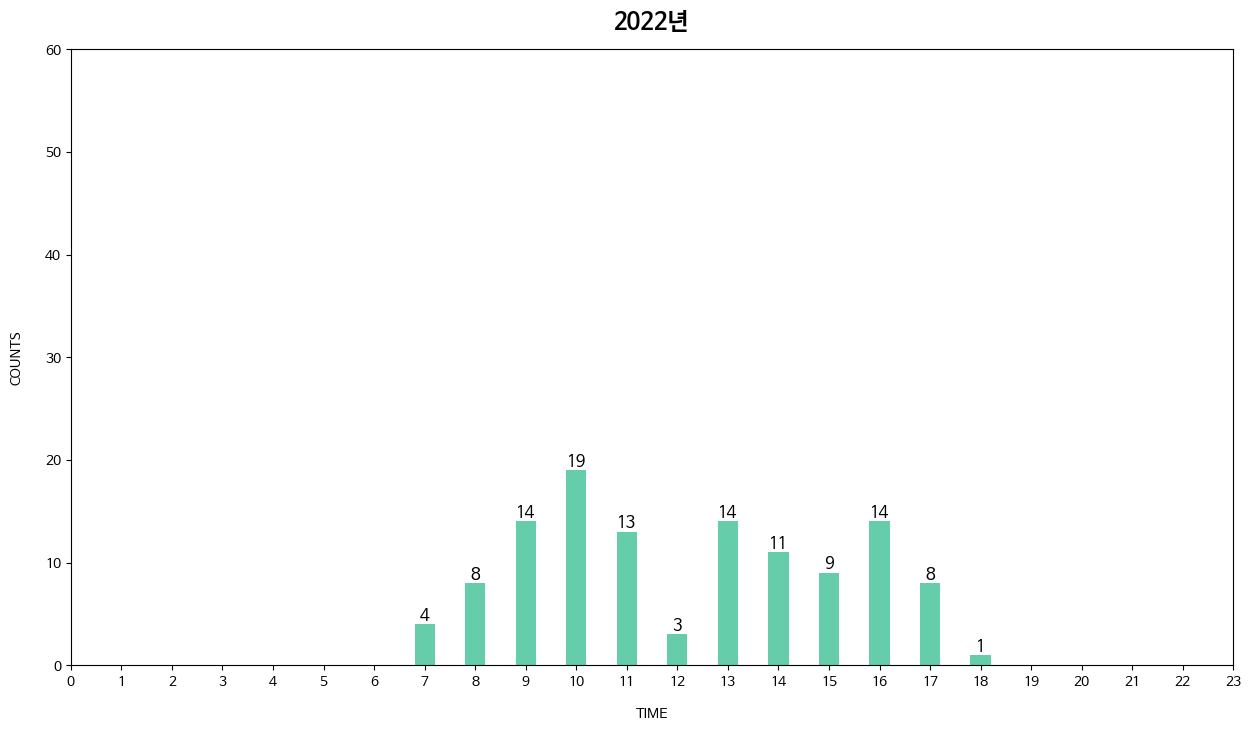

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_4.시간, df_4.진술문수, color='mediumaquamarine', width=0.4)

plt.ylim(0,60)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2023['작성일시']=pd.to_datetime(df_2023['작성일시'])
df_time = df_2023
df_time['hour'] = df_time['작성일시'].dt.hour

df_4_2023=df_time[df_time['진술문명']=='해당 과에 알림']
df_4_2023 = df_4_2023['hour'].value_counts().to_frame().reset_index()
df_4_2023.columns =['시간','진술문수']
df_4_2023 = df_4_2023.sort_values('시간')

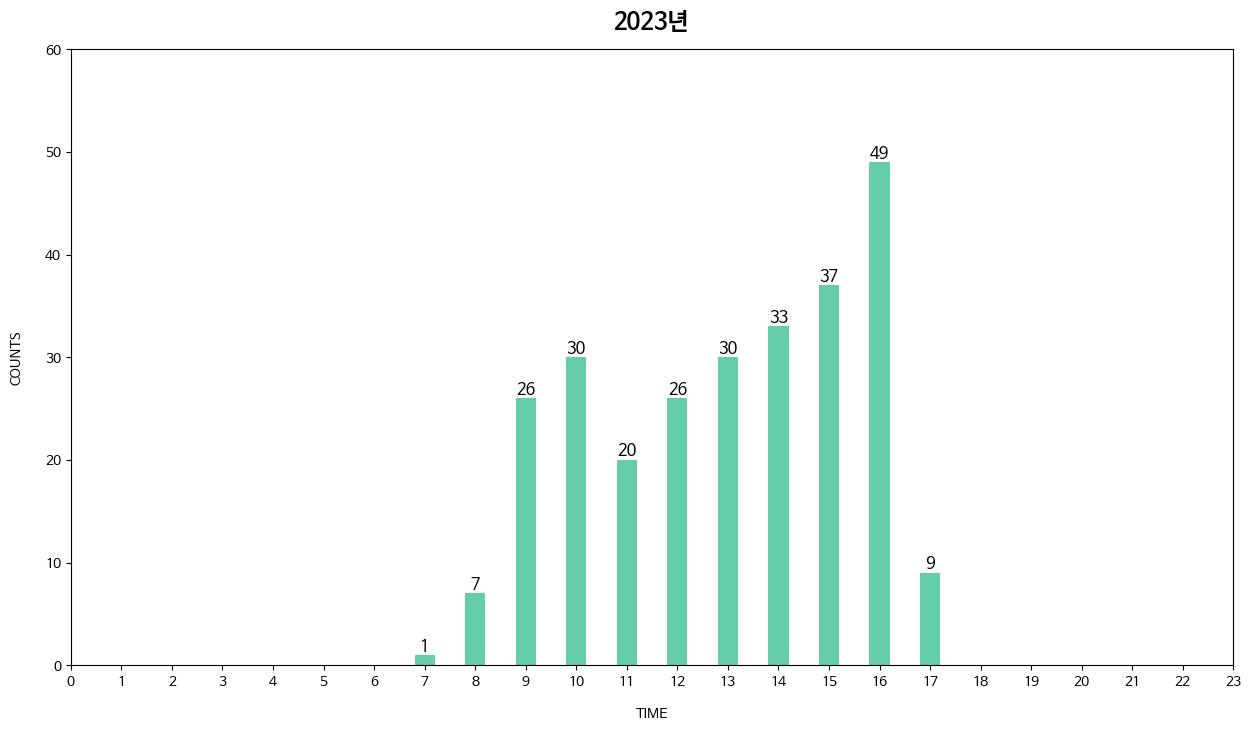

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_4_2023.시간, df_4_2023.진술문수, color='mediumaquamarine', width=0.4)

plt.ylim(0,60)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2022['작성일시']=pd.to_datetime(df_2022['작성일시'])
df_time = df_2022
df_time['hour'] = df_time['작성일시'].dt.hour

df_5=df_time[df_time['진술문명']=='담당 주치의에게 알림']
df_5 = df_5['hour'].value_counts().to_frame().reset_index()
df_5.columns =['시간','진술문수']
df_5 = df_5.sort_values('시간')

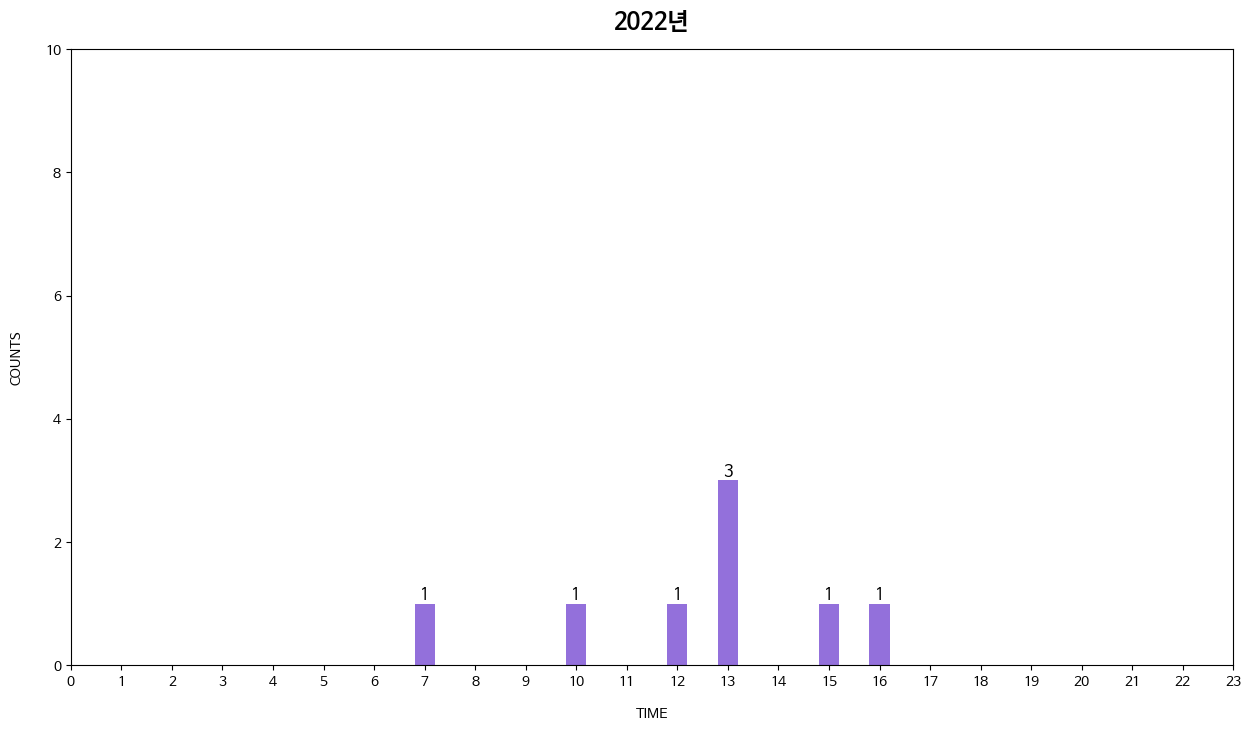

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_5.시간, df_5.진술문수, color='mediumpurple', width=0.4)

plt.ylim(0,10)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

In [ ]:
df_2023['작성일시']=pd.to_datetime(df_2023['작성일시'])
df_time = df_2023
df_time['hour'] = df_time['작성일시'].dt.hour

df_5_2023=df_time[df_time['진술문명']=='담당 주치의에게 알림']
df_5_2023 = df_5_2023['hour'].value_counts().to_frame().reset_index()
df_5_2023.columns =['시간','진술문수']
df_5_2023 = df_5_2023.sort_values('시간')

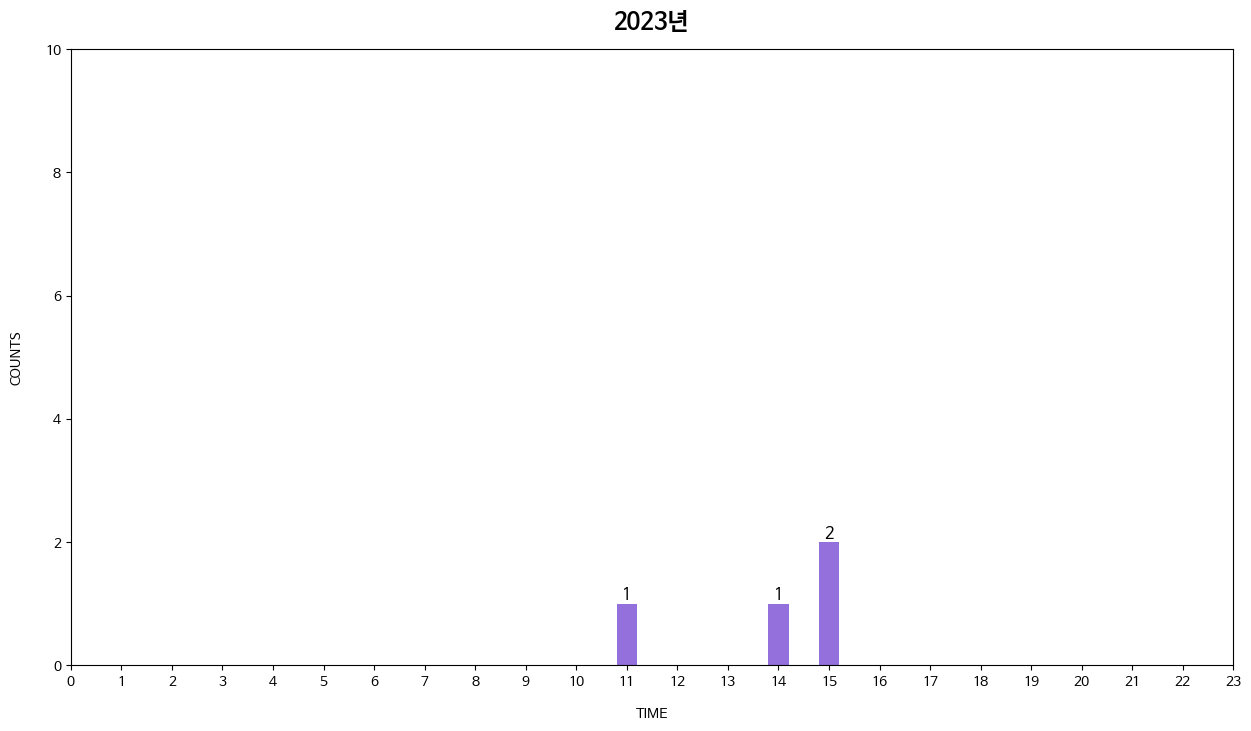

In [ ]:
plt.figure(figsize=(15,8))
bar = plt.bar(df_5_2023.시간, df_5_2023.진술문수, color='mediumpurple', width=0.4)

plt.ylim(0,10)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
# 축 레이블 설정
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)

plt.xticks(df_1.시간)
# 그리드 설정
plt.grid(False)

# 위에 숫자
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%.f'%height, ha='center', va='bottom', size=12)
plt.show()

# 선그래프 시각화 해보기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_0 = df_0.sort_values('시간')

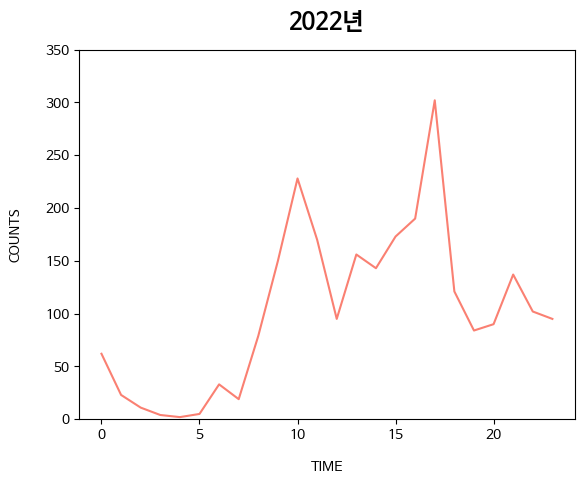

In [ ]:
plt.ylim(0,350)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_0.시간, df_0.진술문수,color = 'salmon')

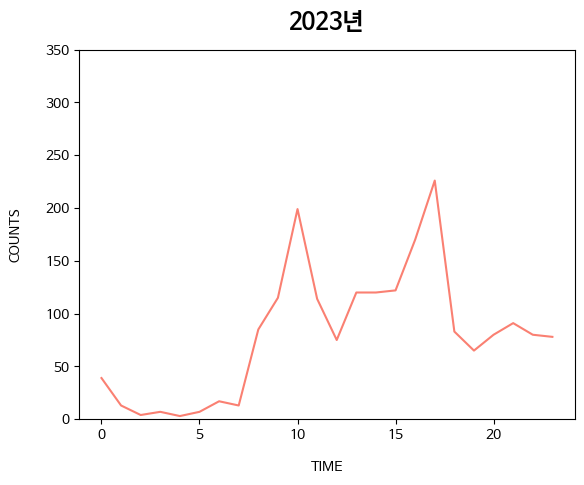

In [ ]:
plt.ylim(0,350)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_0_2023.시간, df_0_2023.진술문수,color = 'salmon')

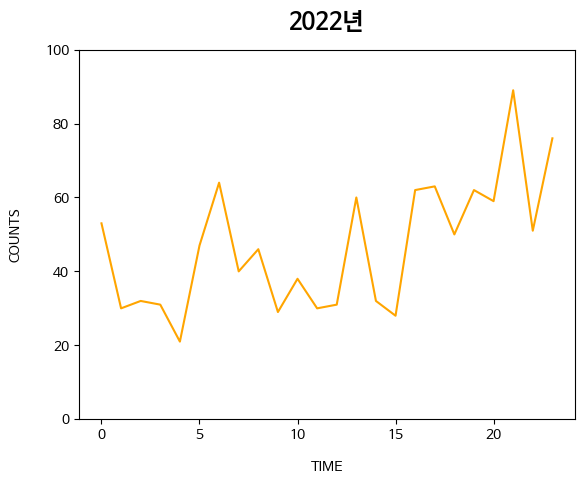

In [ ]:
plt.ylim(0,100)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_1.시간, df_1.진술문수,color = 'orange')

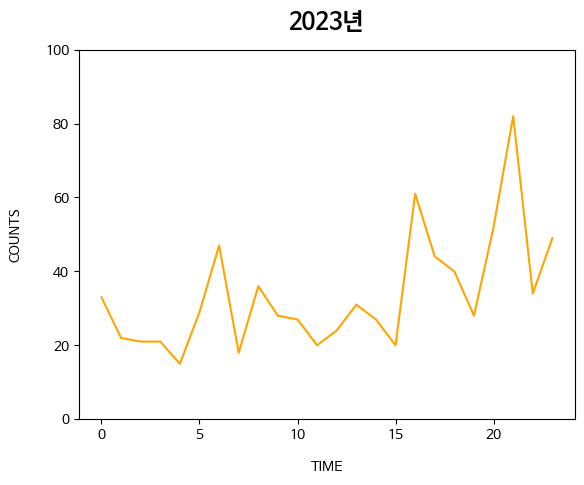

In [ ]:
plt.ylim(0,100)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_1_2023.시간, df_1_2023.진술문수,color = 'orange')

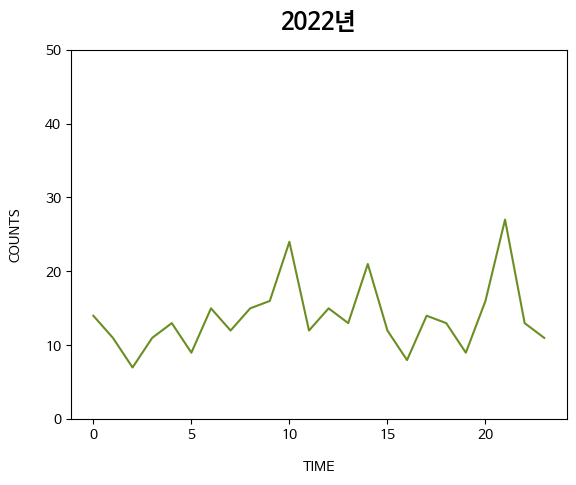

In [ ]:
plt.ylim(0,50)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_2.시간, df_2.진술문수,color = 'olivedrab')

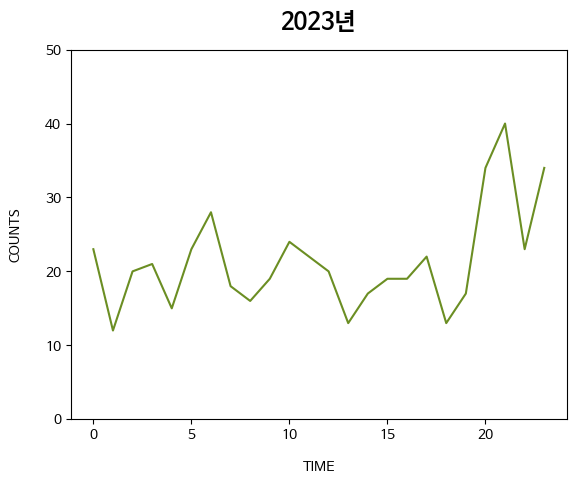

In [ ]:
plt.ylim(0,50)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_2_2023.시간, df_2_2023.진술문수,color = 'olivedrab')

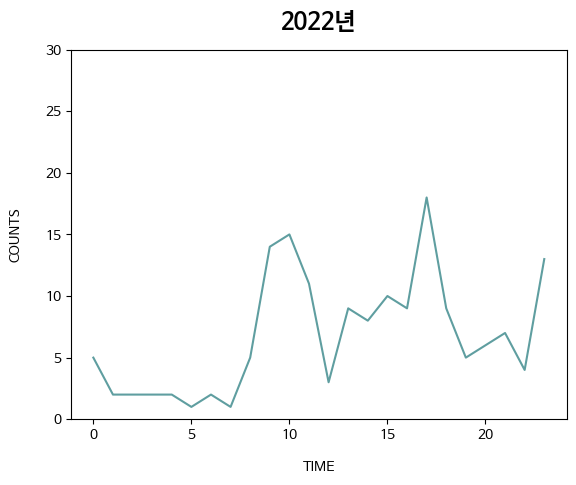

In [ ]:
plt.ylim(0,30)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_3.시간, df_3.진술문수,color = 'cadetblue')

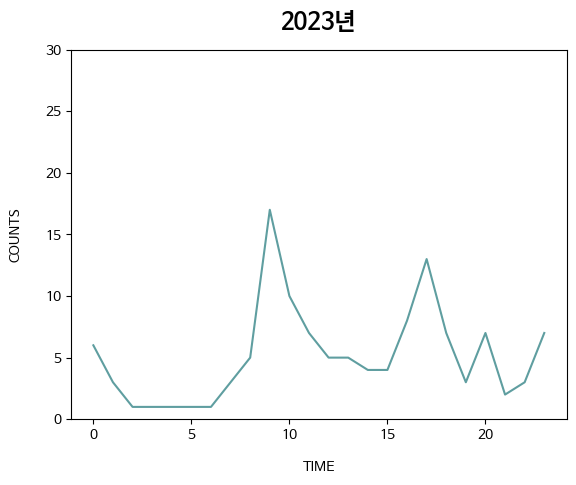

In [ ]:
plt.ylim(0,30)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_3_2023.시간, df_3_2023.진술문수,color = 'cadetblue')

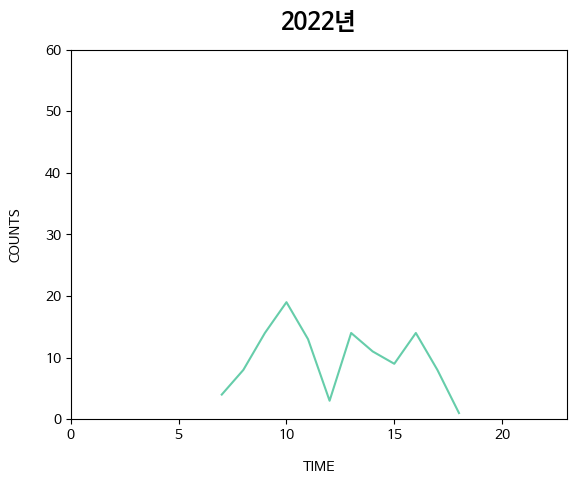

In [ ]:
plt.ylim(0,60)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.xlim(0,23)
plt.title('2022년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_4.시간, df_4.진술문수,color = 'mediumaquamarine')

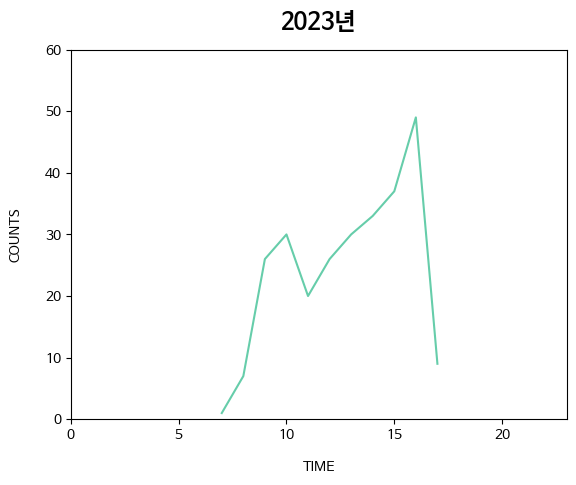

In [ ]:
plt.ylim(0,60)
plt.xlim(0,23)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_4_2023.시간, df_4_2023.진술문수,color = 'mediumaquamarine')

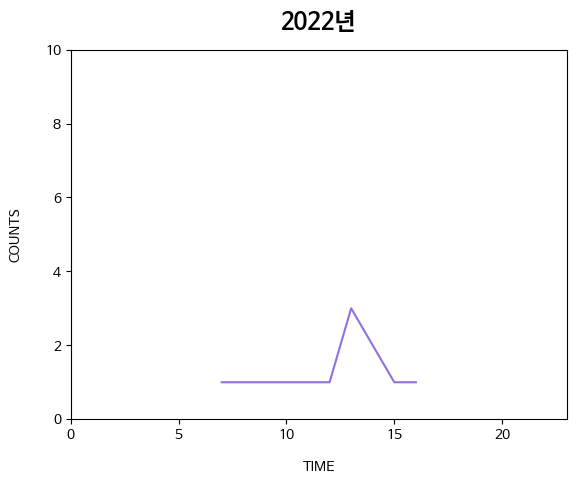

In [ ]:
plt.ylim(0,10)
plt.xlim(0,23)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2022년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_5.시간, df_5.진술문수,color = 'mediumpurple')

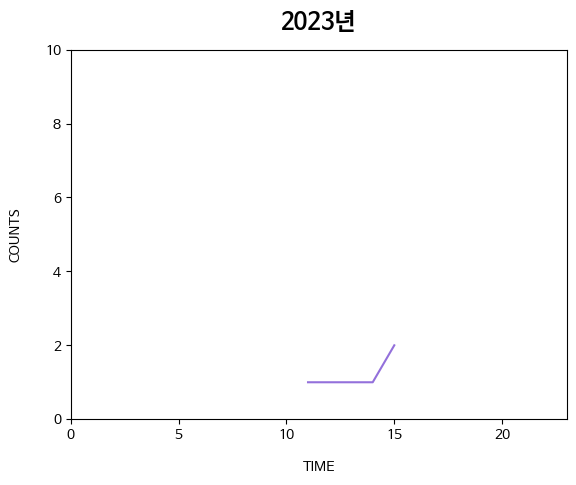

In [ ]:
plt.ylim(0,10)
plt.xlim(0,23)
title_font = {'fontsize':17, 'fontweight':'bold'}
plt.title('2023년', fontdict=title_font, pad=15)
plt.ylabel('COUNTS', labelpad=15)
plt.xlabel('TIME', labelpad=13)
plt.plot(df_5_2023.시간, df_5_2023.진술문수,color = 'mediumpurple')

# 2022년도 2023년도 비교 시각화

In [ ]:
result0 = pd.merge(df_0,df_0_2023,left_on='시간',right_on='시간')

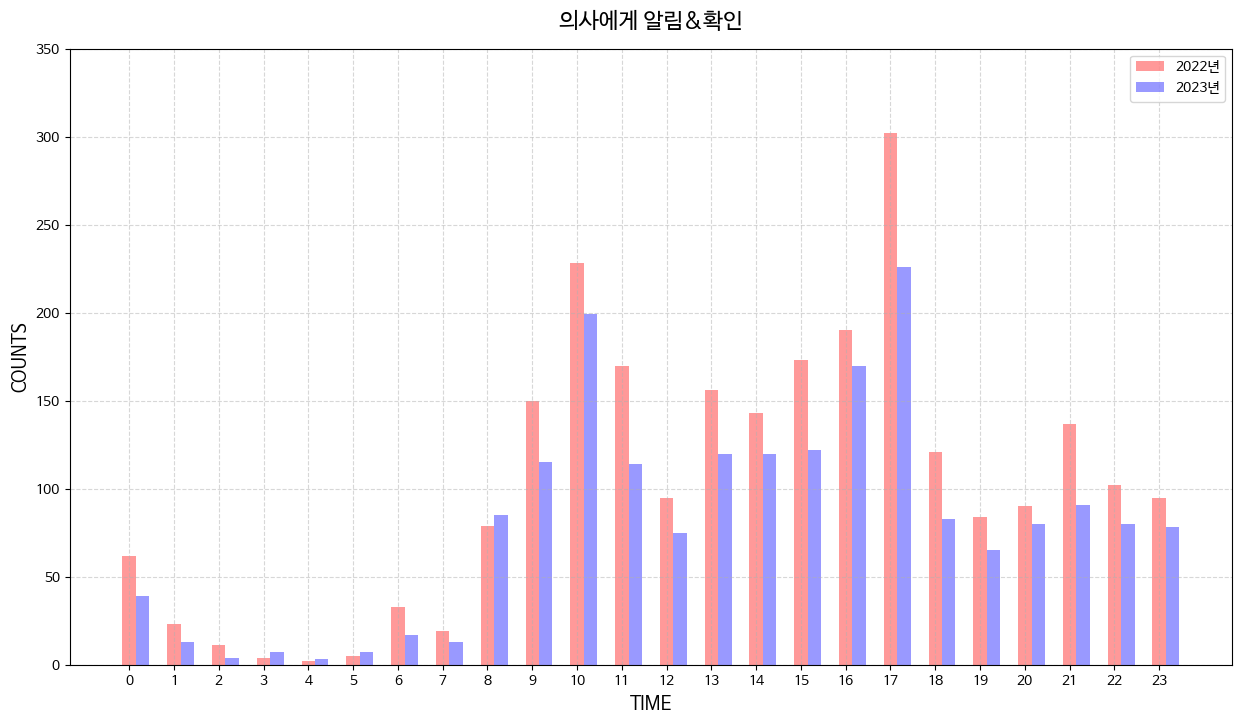

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.3

# x축, y축 이름 및 범례 설정
plt.grid(True, alpha=0.5,linestyle='--')
plt.title('의사에게 알림&확인', pad=15, size = 16)
# plt.xticks(rotation=35)
plt.xlabel('TIME', size = 13)
plt.ylabel('COUNTS', size = 13)

plt.xticks(result0.시간)
plt.ylim(0,350)


# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(result0['시간'], result0['진술문수_x'], bar_width, alpha=0.4, color='red', label='2022년')

b2 = plt.bar(result0['시간']+ bar_width, result0['진술문수_y'], bar_width, alpha=0.4, color='blue', label='2023년')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
# plt.xticks(np.arange(bar_width, 4 + bar_width, 1))
plt.legend()


plt.show()

In [ ]:
result0 = pd.merge(df_1,df_1_2023,left_on='시간',right_on='시간')

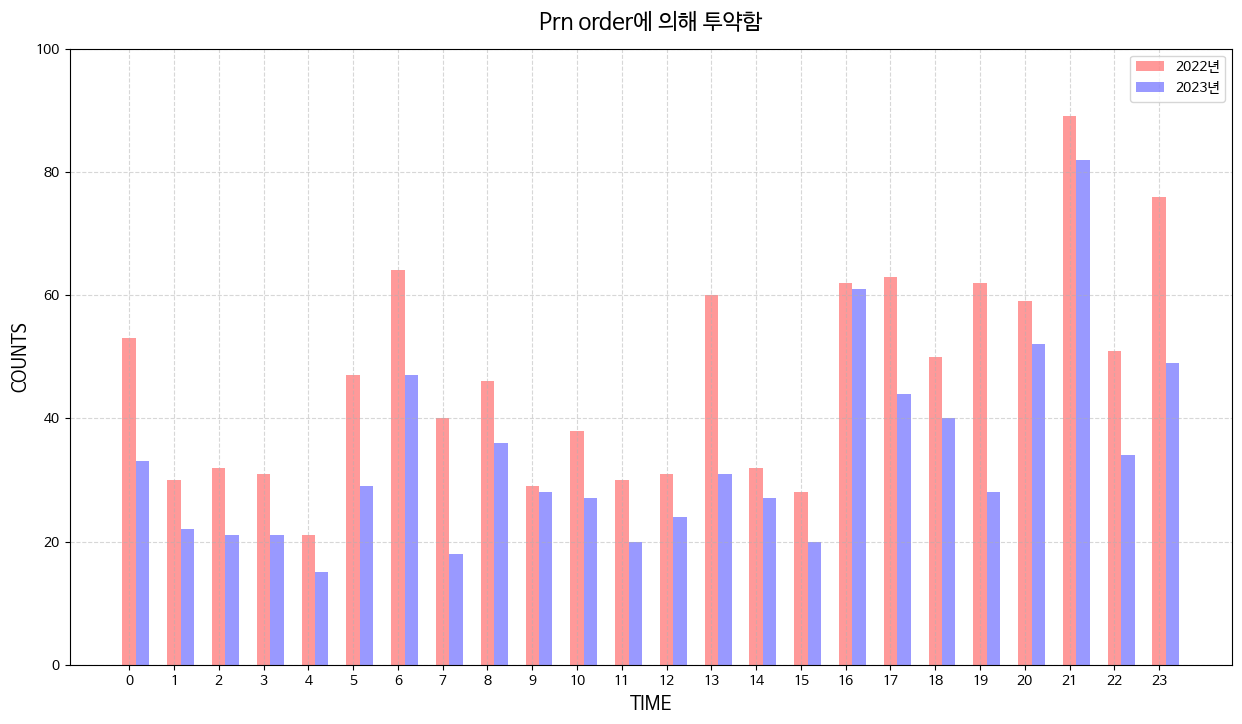

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.3

# x축, y축 이름 및 범례 설정
plt.grid(True, alpha=0.5,linestyle='--')
plt.title('Prn order에 의해 투약함', pad=15, size = 16)
# plt.xticks(rotation=35)
plt.xlabel('TIME', size = 13)
plt.ylabel('COUNTS', size = 13)

plt.xticks(result0.시간)
plt.ylim(0,100)


# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(result0['시간'], result0['진술문수_x'], bar_width, alpha=0.4, color='red', label='2022년')

b2 = plt.bar(result0['시간']+ bar_width, result0['진술문수_y'], bar_width, alpha=0.4, color='blue', label='2023년')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
# plt.xticks(np.arange(bar_width, 4 + bar_width, 1))
plt.legend()


plt.show()

In [ ]:
result0 = pd.merge(df_2,df_2_2023,left_on='시간',right_on='시간')

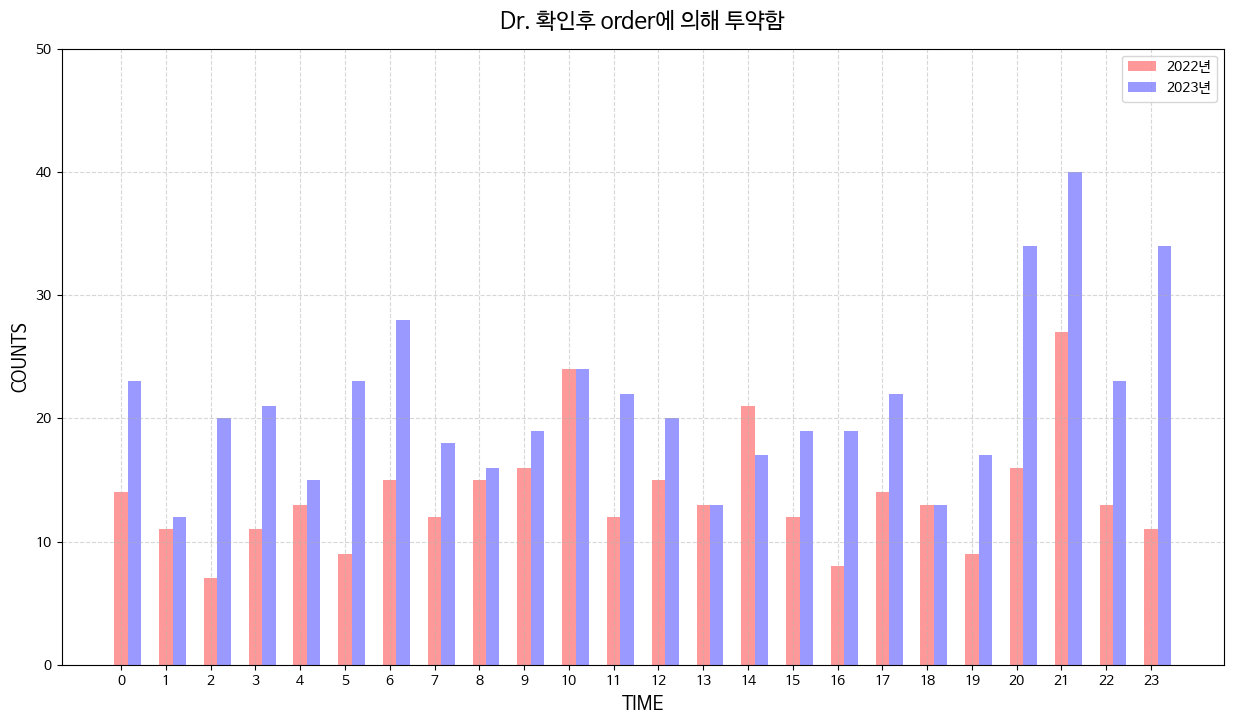

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.3

# x축, y축 이름 및 범례 설정
plt.grid(True, alpha=0.5,linestyle='--')
plt.title('Dr. 확인후 order에 의해 투약함', pad=15, size = 16)
# plt.xticks(rotation=35)
plt.xlabel('TIME', size = 13)
plt.ylabel('COUNTS', size = 13)

plt.xticks(result0.시간)
plt.ylim(0,50)


# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(result0['시간'], result0['진술문수_x'], bar_width, alpha=0.4, color='red', label='2022년')

b2 = plt.bar(result0['시간']+ bar_width, result0['진술문수_y'], bar_width, alpha=0.4, color='blue', label='2023년')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
# plt.xticks(np.arange(bar_width, 4 + bar_width, 1))
plt.legend()


plt.show()

In [ ]:
result_3=pd.merge(result0,df_3,left_on='시간',right_on='시간', how='left')
result_3=pd.merge(result_3,df_3_2023,left_on='시간',right_on='시간', how='left')
result_3.columns = ['시간', 'col1', 'col2','진술문수_x','진술문수_y']
result_3 =result_3.fillna(0)
result_3=result_3.astype('int')
result_3

,시간,col1,col2,진술문수_x,진술문수_y
0,0,14,23,5,6
1,1,11,12,2,3
2,2,7,20,0,1
3,3,11,21,0,0
4,4,13,15,2,0
5,5,9,23,1,0
6,6,15,28,2,1
7,7,12,18,1,3
8,8,15,16,5,5
9,9,16,19,14,17


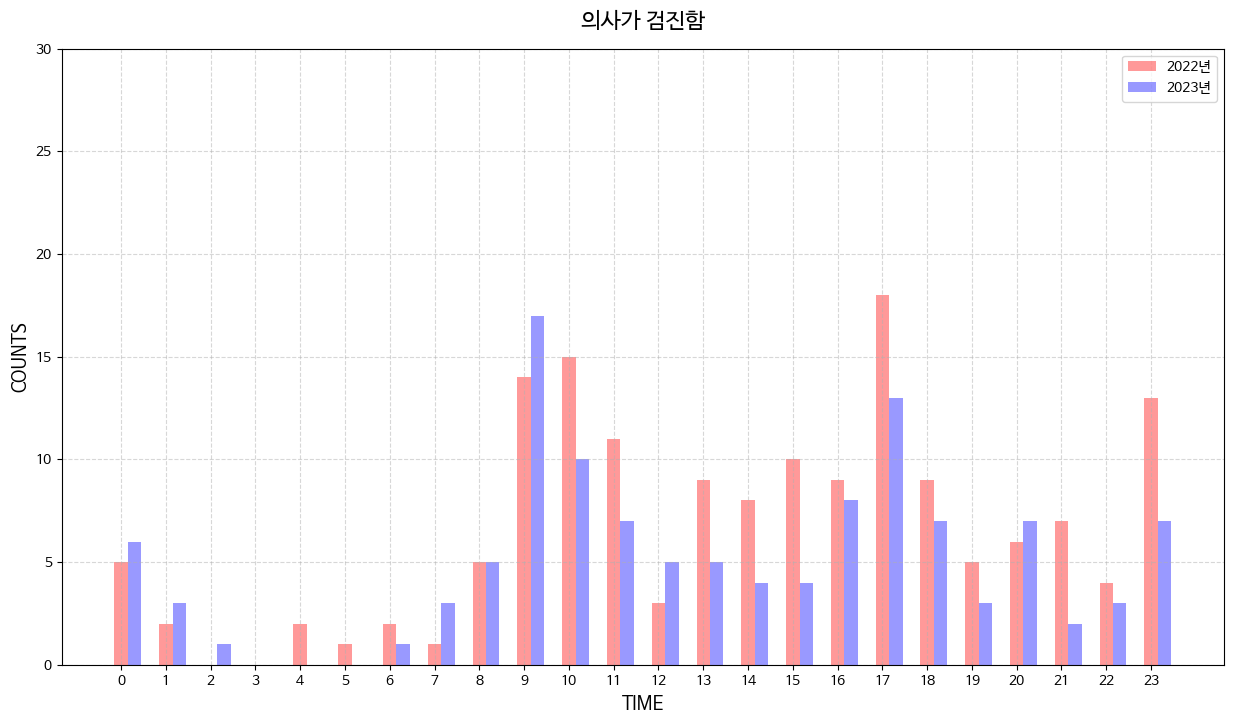

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.3

# x축, y축 이름 및 범례 설정
plt.grid(True, alpha=0.5,linestyle='--')
plt.title('의사가 검진함', pad=15, size = 16)
# plt.xticks(rotation=35)
plt.xlabel('TIME', size = 13)
plt.ylabel('COUNTS', size = 13)

plt.xticks(result0.시간)
plt.ylim(0,30)


# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(result_3['시간'], result_3['진술문수_x'], bar_width, alpha=0.4, color='red', label='2022년')

b2 = plt.bar(result_3['시간']+ bar_width, result_3['진술문수_y'], bar_width, alpha=0.4, color='blue', label='2023년')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
# plt.xticks(np.arange(bar_width, 4 + bar_width, 1))
plt.legend()


plt.show()

In [ ]:
result_4=pd.merge(result0,df_4,left_on='시간',right_on='시간', how='left')
result_4=pd.merge(result_4,df_4_2023,left_on='시간',right_on='시간', how='left')
result_4.columns = ['시간', 'col1', 'col2','진술문수_x','진술문수_y']
result_4 =result_4.fillna(0)
result_4=result_4.astype('int')
result_4

,시간,col1,col2,진술문수_x,진술문수_y
0,0,14,23,0,0
1,1,11,12,0,0
2,2,7,20,0,0
3,3,11,21,0,0
4,4,13,15,0,0
5,5,9,23,0,0
6,6,15,28,0,0
7,7,12,18,4,1
8,8,15,16,8,7
9,9,16,19,14,26


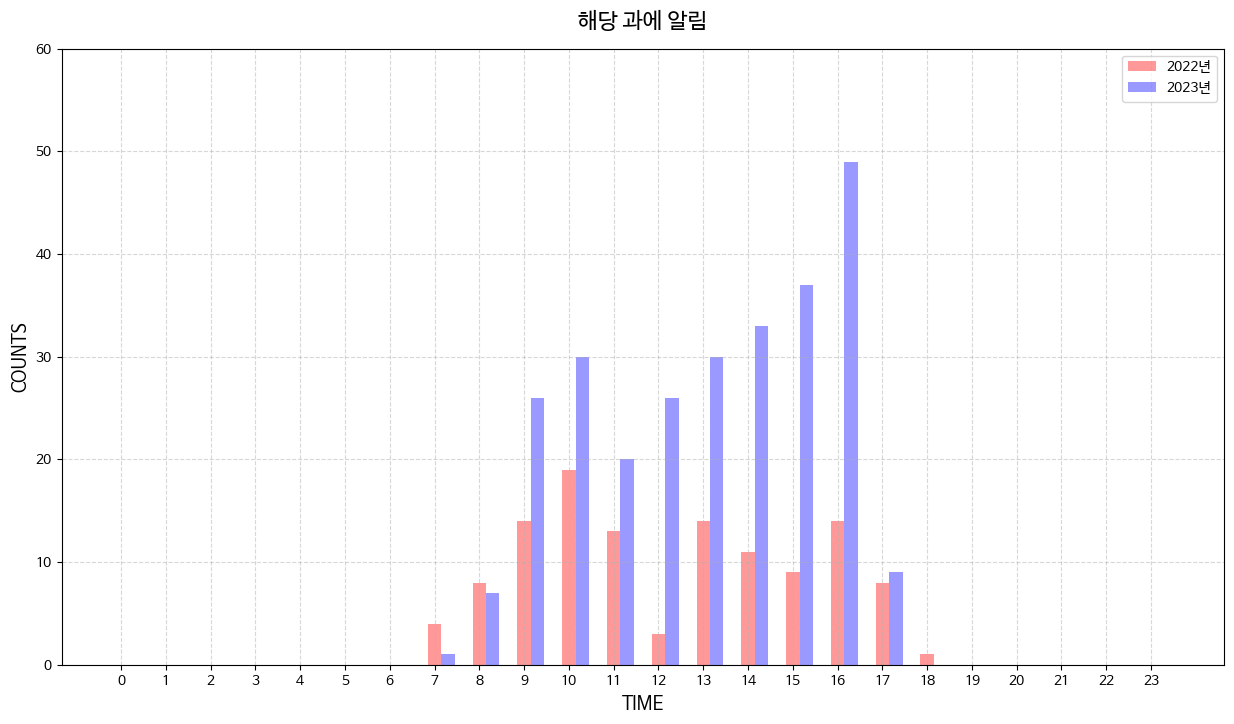

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.3

# x축, y축 이름 및 범례 설정
plt.grid(True, alpha=0.5,linestyle='--')
plt.title('해당 과에 알림', pad=15, size = 16)
# plt.xticks(rotation=35)
plt.xlabel('TIME', size = 13)
plt.ylabel('COUNTS', size = 13)

plt.xticks(result0.시간)
plt.ylim(0,60)


# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(result0['시간'], result_4['진술문수_x'], bar_width, alpha=0.4, color='red', label='2022년')

b2 = plt.bar(result0['시간']+ bar_width, result_4['진술문수_y'], bar_width, alpha=0.4, color='blue', label='2023년')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
# plt.xticks(np.arange(bar_width, 4 + bar_width, 1))
plt.legend()


plt.show()

In [ ]:
result_5=pd.merge(result0,df_5,left_on='시간',right_on='시간', how='left')
result_5=pd.merge(result_5,df_5_2023,left_on='시간',right_on='시간', how='left')
result_5.columns = ['시간', 'col1', 'col2','진술문수_x','진술문수_y']
result_5 =result_5.fillna(0)
result_5=result_5.astype('int')
result_5

,시간,col1,col2,진술문수_x,진술문수_y
0,0,14,23,0,0
1,1,11,12,0,0
2,2,7,20,0,0
3,3,11,21,0,0
4,4,13,15,0,0
5,5,9,23,0,0
6,6,15,28,0,0
7,7,12,18,1,0
8,8,15,16,0,0
9,9,16,19,0,0


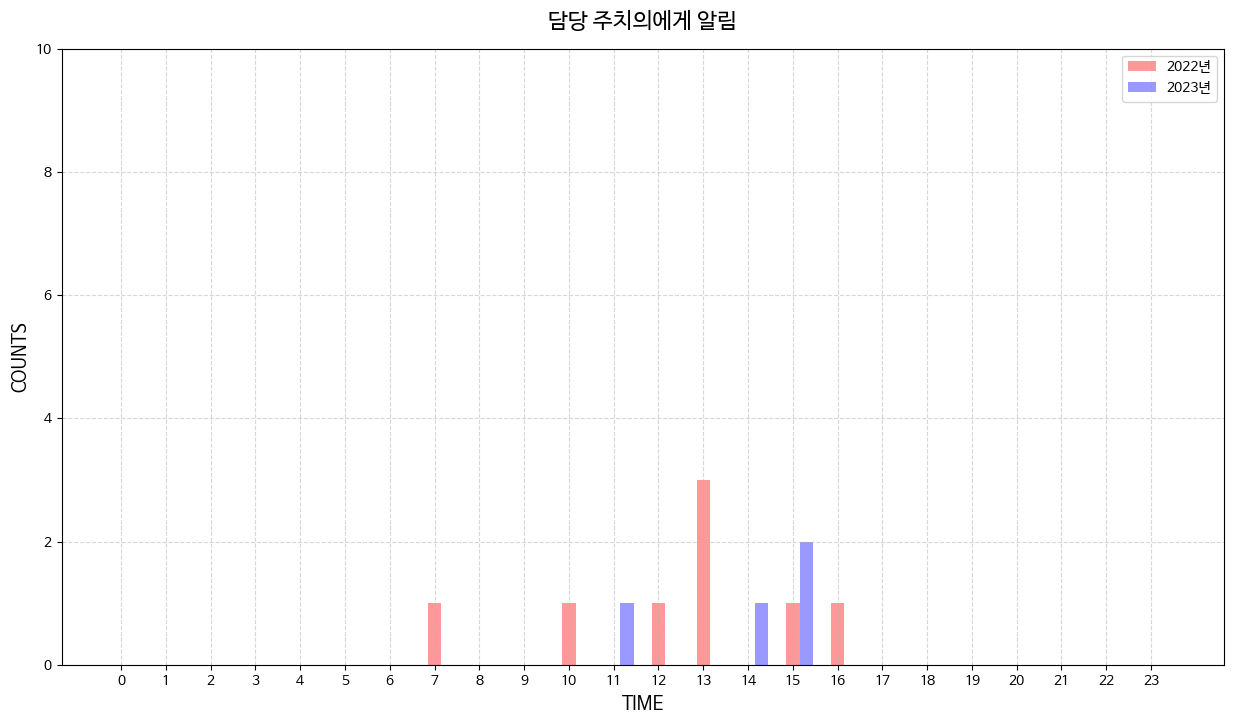

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.3

# x축, y축 이름 및 범례 설정
plt.grid(True, alpha=0.5,linestyle='--')
plt.title('담당 주치의에게 알림', pad=15, size = 16)
# plt.xticks(rotation=35)
plt.xlabel('TIME', size = 13)
plt.ylabel('COUNTS', size = 13)

plt.xticks(result0.시간)
plt.ylim(0,10)


# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(result0['시간'], result_5['진술문수_x'], bar_width, alpha=0.4, color='red', label='2022년')

b2 = plt.bar(result0['시간']+ bar_width, result_5['진술문수_y'], bar_width, alpha=0.4, color='blue', label='2023년')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
# plt.xticks(np.arange(bar_width, 4 + bar_width, 1))
plt.legend()


plt.show()

In [ ]:
df_2022

,순번,환자명,작성일시,간호진술문ID,진술문명,hour
0,330,박**숙,2022-10-01 00:21:00,3536,prn order에 의해 투약함,0
3,242,장**혜,2022-10-01 00:53:00,3536,prn order에 의해 투약함,0
5,308,조**주,2022-10-01 01:26:00,30768,Dr.확인후 order에 의해 투약함,1
7,308,조**주,2022-10-01 01:26:00,323,의사에게 알림&확인,1
9,340,김**일,2022-10-01 02:15:00,3536,prn order에 의해 투약함,2
...,...,...,...,...,...,...
8551,23,박**우,2022-12-07 23:16:00,317,의사가 검진함,23
8552,450,민**일,2022-12-07 23:23:00,321,의사에게 알림&확인,23
8553,450,민**일,2022-12-07 23:23:00,317,의사가 검진함,23
8555,410,김**옥,2022-12-07 23:39:00,3536,prn order에 의해 투약함,23
